In [1]:
import pandas as pd
import numpy as np

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
colors = list(mcolors.TABLEAU_COLORS.keys())*2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    'MX': 'Mexico',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark',
    'KE': 'Kenya', 
    'NG': 'Nigeria',
    'JP': 'Japan',
    'SE': 'Sweden',
    'ID': 'Indonesia',
    'EG': 'Egypt'
}


parentDirectory = os.path.abspath(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir),os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

In [2]:
event_dicts = [{'country': 'AU',
  'end_md_1': '2020-06-07',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'BR',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-23',
  'start_md_2': np.nan},
 {'country': 'CA',
  'end_md_1': '2020-06-21',
  'start_md_1': '2020-03-19',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'end_md_1': '2020-05-09',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'end_md_1': '2020-05-07',
  'start_md_1': '2020-03-17',
  'start_md_2': np.nan},
 {'country': 'EG',
  'end_md_1': '2020-07-01',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'ES',
  'end_md_1': '2020-06-14',
  'start_md_1': '2020-03-17',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'end_md_1': '2020-06-08',
  'start_md_1': '2020-03-18',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'end_md_1': '2020-08-03',
  'start_md_1': '2020-03-23',
  'start_md_2': '2020-10-21'},
 {'country': 'ID',
  'end_md_1': '2020-08-10',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IN',
  'end_md_1': '2020-10-29',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'IT',
  'end_md_1': '2020-06-06',
  'start_md_1': '2020-03-11',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'end_md_1': '2020-05-30',
  'start_md_1': '2020-04-12',
  'start_md_2': np.nan},
 {'country': 'KE',
  'end_md_1': '2020-10-04',
  'start_md_1': '2020-03-24',
  'start_md_2': np.nan},
 {'country': 'MX',
  'end_md_1': '2020-10-06',
  'start_md_1': '2020-03-25',
  'start_md_2': np.nan},
 {'country': 'NG',
  'end_md_1': '2020-08-09',
  'start_md_1': '2020-03-27',
  'start_md_2': np.nan},
 {'country': 'SE',
  'end_md_1': '2020-04-09',
  'start_md_1': '2020-04-03',
  'start_md_2': np.nan},
 {'country': 'US',
  'end_md_1': '2020-06-11',
  'start_md_1': '2020-03-21',
  'start_md_2': '2020-11-26'}]

In [3]:
df_events = pd.DataFrame(event_dicts)

In [4]:
df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [5]:
df_agg = pd.read_pickle(DATA_DIR+'df_agg_cats.pickle')

In [6]:
df_agg

,country,category,volume_weekly_total,volume_weekly_total_l,volume_weekly_total_h,volume_percent_weekly_total
0,FR,dessert,2019-01-06 2039.955977 2019-01-13 2326.4...,2019-01-06 1835.859784 2019-01-13 2099.2...,2019-01-06 2268.661639 2019-01-13 2580.8...,2019-01-06 0.181580 2019-01-13 0.198787 ...
1,FR,soft drink,2019-01-06 121.671207 2019-01-13 129.083...,2019-01-06 114.391114 2019-01-13 121.331...,2019-01-06 129.498450 2019-01-13 137.439...,2019-01-06 0.010830 2019-01-13 0.011030 ...
2,FR,rice dish,2019-01-06 302.488958 2019-01-13 311.905...,2019-01-06 278.087672 2019-01-13 287.005...,2019-01-06 329.392011 2019-01-13 339.326...,2019-01-06 0.026925 2019-01-13 0.026651 ...
3,FR,soup,2019-01-06 401.235196 2019-01-13 366.711...,2019-01-06 369.185323 2019-01-13 337.439...,2019-01-06 436.562920 2019-01-13 399.011...,2019-01-06 0.035715 2019-01-13 0.031334 ...
4,FR,spice,2019-01-06 388.295133 2019-01-13 396.663...,2019-01-06 355.745896 2019-01-13 363.625...,2019-01-06 424.161427 2019-01-13 433.033...,2019-01-06 0.034563 2019-01-13 0.033893 ...
...,...,...,...,...,...,...
499,EG,cocktail,2019-01-06 10.667190 2019-01-13 9.11911...,2019-01-06 10.235867 2019-01-13 8.74368...,2019-01-06 11.296213 2019-01-13 9.72031...,2019-01-06 0.005317 2019-01-13 0.004847 ...
500,EG,salad,2019-01-06 30.043243 2019-01-13 29.89966...,2019-01-06 28.307436 2019-01-13 28.16831...,2019-01-06 32.025813 2019-01-13 31.78758...,2019-01-06 0.014974 2019-01-13 0.015892 ...
501,EG,sandwich,2019-01-06 13.229550 2019-01-13 8.20939...,2019-01-06 12.664763 2019-01-13 7.80812...,2019-01-06 13.858189 2019-01-13 8.67345...,2019-01-06 0.006594 2019-01-13 0.004363 ...
502,EG,sausage,2019-01-06 10.115526 2019-01-13 11.84954...,2019-01-06 9.609782 2019-01-13 11.31384...,2019-01-06 10.682971 2019-01-13 12.43453...,2019-01-06 0.005042 2019-01-13 0.006298 ...


In [7]:
weeks_2019 = list(df_agg.iloc[0]['volume_weekly_total'].index)[:52]
weeks_2020 = list(df_agg.iloc[0]['volume_weekly_total'].index)[52:]

In [8]:
l = []
for cnt, row in df_agg.iterrows():
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_weekly_total'].index,row['volume_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

        

In [9]:
df = pd.DataFrame(l)

In [10]:
#df.to_pickle('df_RDD_mobility_decrease')

### Check what is the highest bandwidth we can have

In [11]:
df.groupby('country').agg('k').max()

country
AU    40
BR    40
CA    30
DE    39
DK    41
EG    40
ES    33
FR    33
GB    30
ID    40
IN    40
IT    34
JP    38
KE    40
MX    40
NG    40
SE    39
US    36
Name: k, dtype: int64

In [12]:
df.groupby('country').agg('k').min()

country
AU   -11
BR   -11
CA   -10
DE   -10
DK   -10
EG   -11
ES   -10
FR   -10
GB   -11
ID   -11
IN   -11
IT    -9
JP   -13
KE   -11
MX   -11
NG   -11
SE   -12
US   -10
Name: k, dtype: int64

In [13]:
df.groupby('country').agg('k').max().min()

30

In [14]:
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)]

In [15]:
df = df.loc[(df['country'].isin(list(full_names.keys())))]

In [16]:
len(df)

42056

In [17]:
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

In [18]:
df.head()

,country,category,k,volume_total,volume_percent,year,intervention_flag
0,FR,dessert,-10,2039.955977,0.181580,2019,0
1,FR,dessert,-9,2326.485943,0.198787,2019,0
2,FR,dessert,-8,2606.733177,0.215539,2019,0
3,FR,dessert,-7,3202.050851,0.256282,2019,0
4,FR,dessert,-6,2903.151871,0.237320,2019,0


In [19]:
def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year"
    return eq
    

In [20]:
cats =  list(df['category'].unique())

In [21]:
len(cats)

28

In [22]:
def make_stars(val):
    if val<0.0001:
        return '****'
    elif val<0.001:
        return '***'
    elif val<0.01:
        return '**'
    elif val<0.05:
        return '*'
    else:
        return ''

In [23]:
def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year*C(country)*C(category)"
    return eq
    

In [24]:
k = 30

In [25]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_total'] = df_temp['volume_total'].apply(lambda x: np.log(x + 0.001))

mod = smf.ols(generate_equation_interactions('Constant'), data = df_temp)

result_interactions = mod.fit(cov_type='hc0')

In [26]:
sorted(cats)

['beef dish',
 'bread and flatbread',
 'cheese',
 'chicken dish',
 'cocktail',
 'dessert',
 'egg dish',
 'fish dish',
 'fruit',
 'herb',
 'lamb dish',
 'pasta, pizza and noodle dish',
 'pastry and bakery product',
 'pie',
 'pork dish',
 'potato dish',
 'rice dish',
 'salad',
 'sandwich',
 'sauce',
 'sausage',
 'snack',
 'soft drink',
 'soup',
 'spice',
 'stew',
 'vegetable and legume',
 'wine, beer and liquor']

In [27]:
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

In [28]:
default_country = 'AU'
default_category = 'beef dish'

alpha_baseline = 'intervention_flag:year[T.2020]'


list_results = []



for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
    

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            

        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error

        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)

In [29]:
df_results_interactions = pd.DataFrame(list_results)

In [30]:
df_results

,country,category,alpha,alpha_ste
0,AU,dessert,0.220341,0.029588
1,AU,soft drink,0.107296,0.038532
2,AU,rice dish,0.134461,0.023473
3,AU,soup,-0.073746,0.077458
4,AU,spice,0.212365,0.021869
...,...,...,...,...
499,EG,cocktail,-0.587067,0.124609
500,EG,salad,0.198336,0.089350
501,EG,sandwich,0.170242,0.149249
502,EG,sausage,0.045595,0.121038


## 1. For all categories, show alpha in different countries

In [31]:
df_results['is_sign'] = ((df_results['alpha']>0) & ((df_results['alpha'] - 2*df_results['alpha_ste'])>0)) | \
((df_results['alpha']<0) & ((df_results['alpha'] + 2*df_results['alpha_ste'])<0))

In [32]:
cats_sorted = list(df_results.loc[df_results['is_sign']].groupby('category')['alpha'].agg('median').sort_values(ascending = False).index)

countries_sorted = list(df_results.groupby('country')['alpha'].\
     agg('mean').sort_values(ascending = False).index)


In [33]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

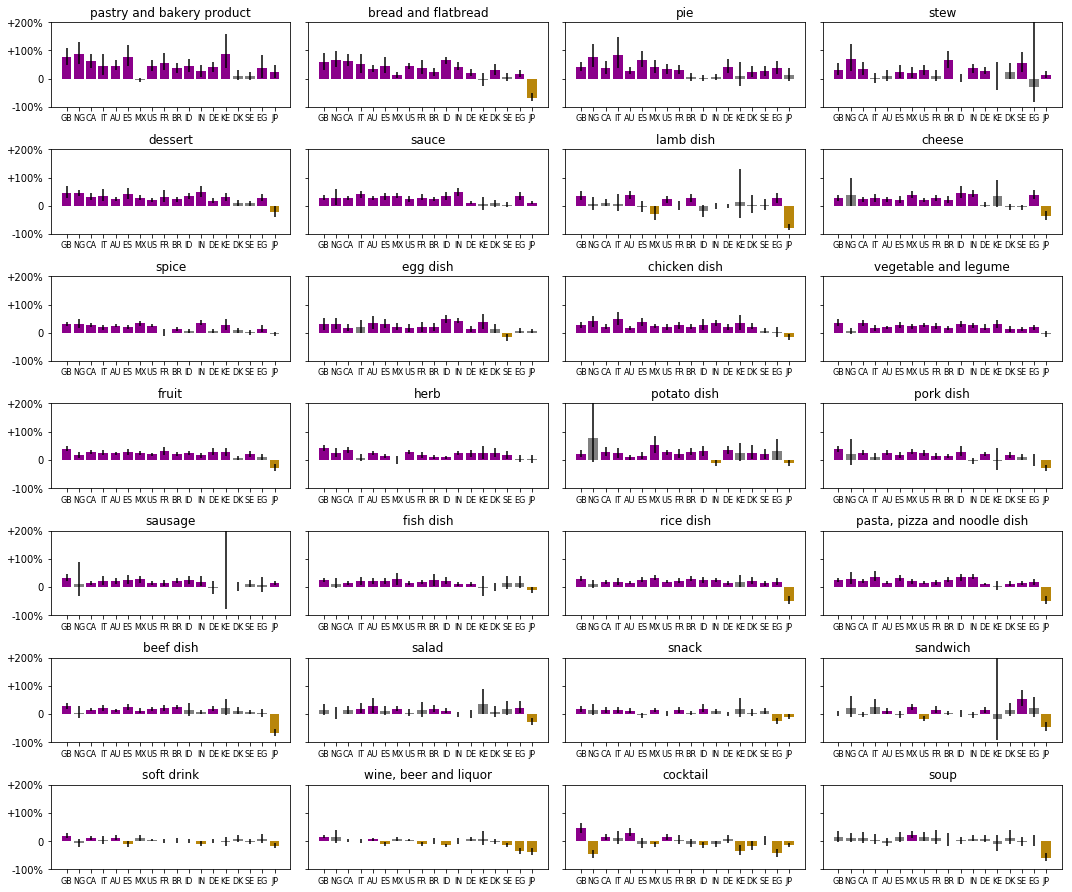

In [34]:
fig, axes = plt.subplots(7,4, figsize = (15,12.5), sharey = True)

for cnt,c in enumerate(cats_sorted):
    sbplt = axes[math.floor(cnt/4), cnt%4]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(18):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    
    sbplt.bar(range(18),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    sbplt.set_xticks(range(18))
    sbplt.set_xticklabels(x['country'], fontsize= 8)
    sbplt.set_title(c)
    
    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,2])

#fig.suptitle("α", position = (0.5, 1.05))
plt.tight_layout()

plt.savefig(FIGURES_DIR+"appendix_const_cats.pdf", bbox_inches='tight')

In [35]:
def make_star_ste(value,ste):
    if value>0 and value-2*ste>0:
        return '*'
    elif value<0 and value+2*ste<0:
        return '*'
    else:
        return ''

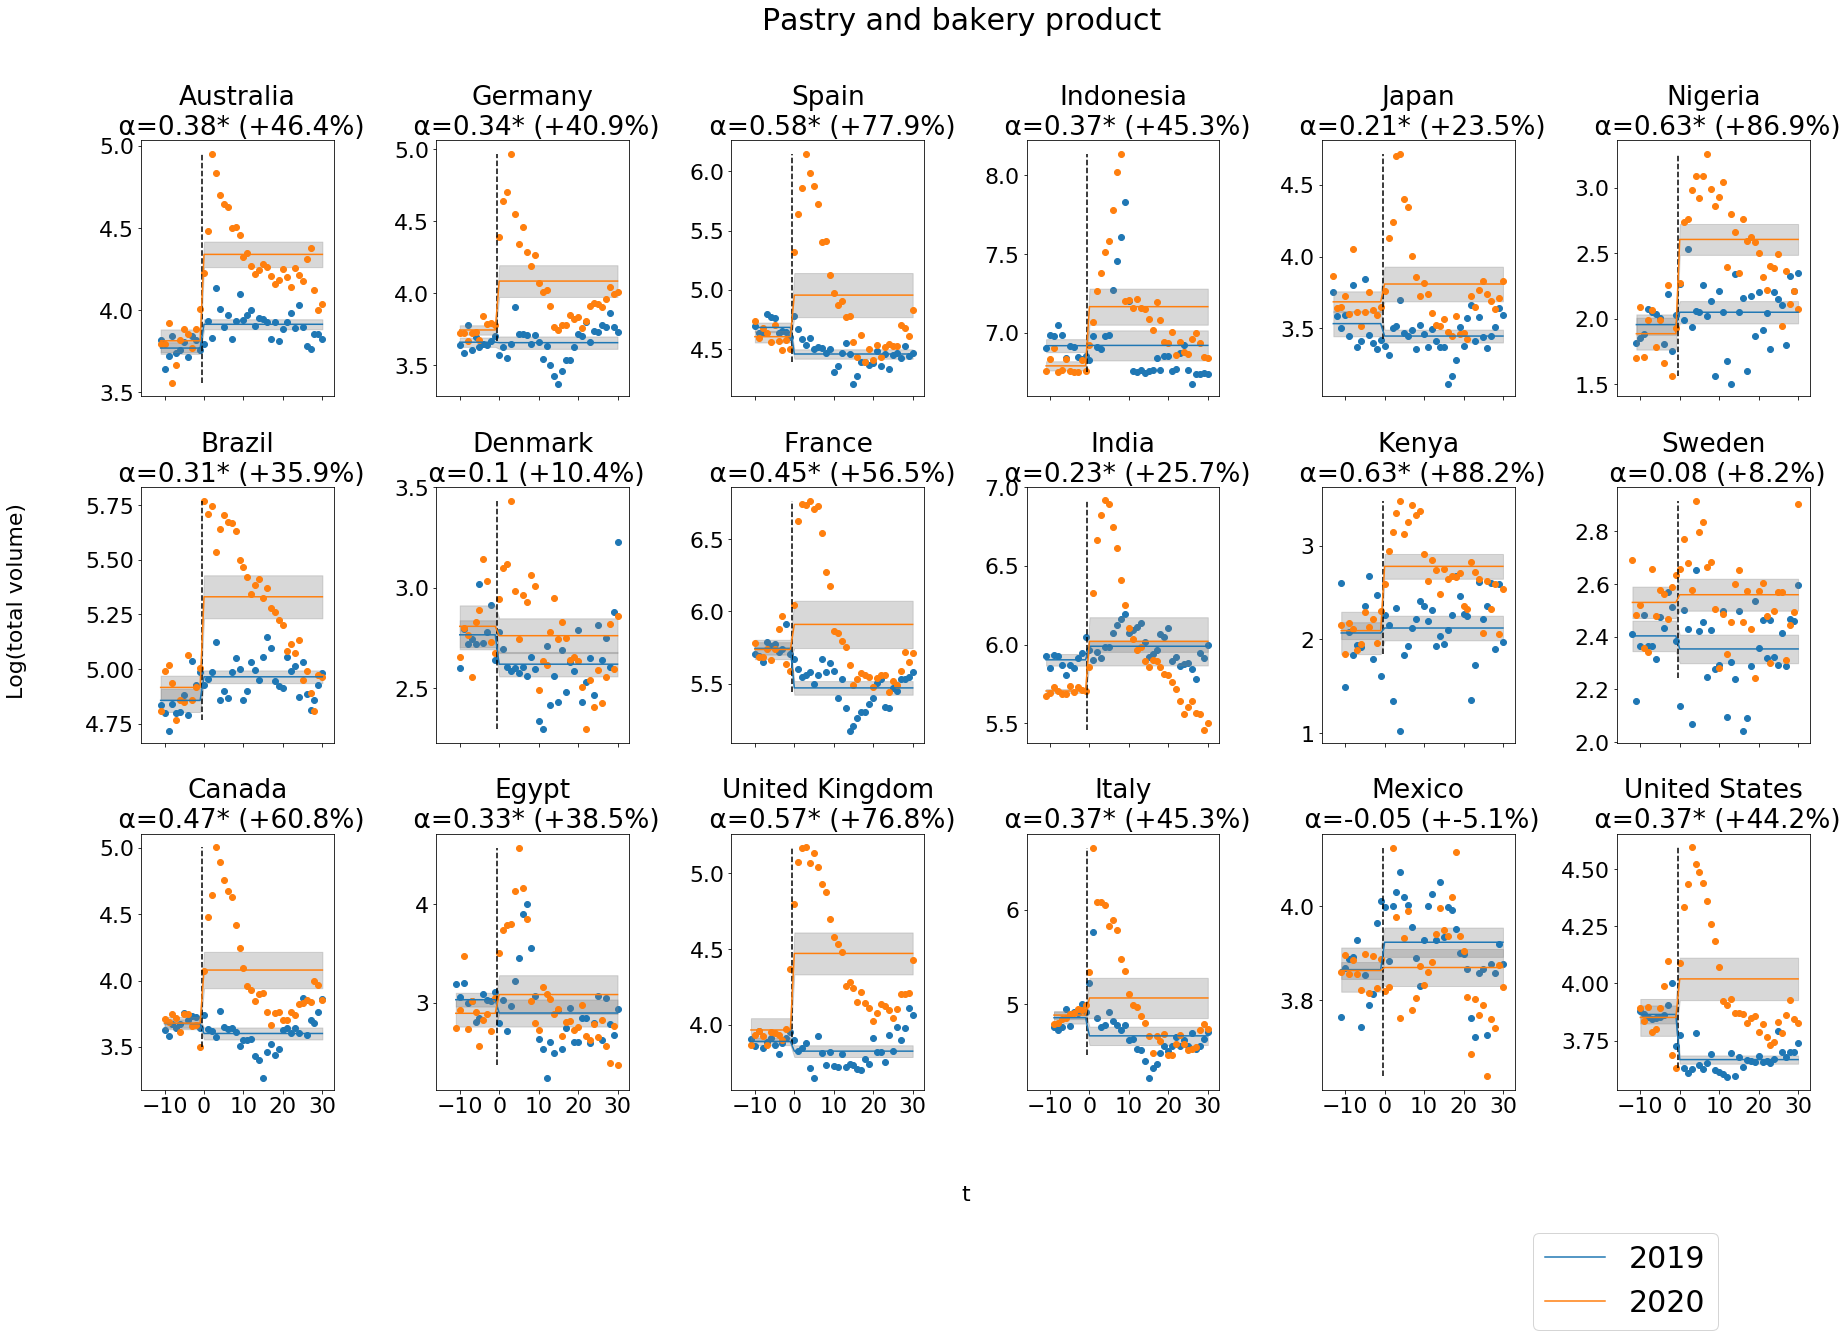

In [36]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(3,6, figsize= (25,15), sharex = True, sharey = False)

cnt = 0
for country,gr1 in df.groupby('country'):
    for category,gr2 in gr1.groupby('category'):
        if category == 'pastry and bakery product':
            gr2
            sbplt = ax[cnt%3, math.floor(cnt/3)]
            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

            df_temp = df_temp.loc[df_temp['year'] == '2019']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:blue', label = '2019')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:blue')


            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

            df_temp = df_temp.loc[df_temp['year'] == '2020']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:orange', label = '2020')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:orange')

            
            
            sbplt.vlines(-0.5,(df_temp['volume_total'].values.min()),
                         (df_temp['volume_total'].values.max()), linestyle = '--')
            sbplt.set_xticks([-10,0,10,20,30])
            
            tmp = df_results_interactions.loc[(df_results_interactions['country'] == country)& (df_results_interactions['category'] == category)].iloc[0]
    
            sbplt.set_title(full_names[country]+'\n α='+str(round(tmp['alpha'],2))+(make_star_ste(tmp['alpha'],tmp['alpha_ste'])) + ' (+' +str(round((np.exp(tmp['alpha'])-1)*100,1))+ '%)')
            
            
    cnt+=1
   
plt.tight_layout()
fig.text(-0.03, 0.5, 'Log(total volume)', va='center', rotation='vertical')
fig.text(0.5, -0.05, 't', va='center', rotation='horizontal')


fig.suptitle('Pastry and bakery product', position = (0.5,1.05), fontsize= 30)
sbplt.legend(bbox_to_anchor = (0.6,-0.5), fontsize= 30)

plt.savefig(FIGURES_DIR+"example_bakery_fitted_constant.pdf", bbox_inches='tight')